<center>
<img src="logo.png" height="900"> 
</center>


# Байесовская домашка

В этом задании мы оценим несколько простых моделей с помощью `pymc3`. 

Задачи делались [на основе книги Байесовские методы для хакеров.](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers) В ней вы можете найти ещё больше примеров использования байесовских методов с помощью pymc3. 

In [1]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import pymc3 as pm
pm.__version__

WARNING (theano.link.c.cmodule): install mkl with `conda install mkl-service`: No module named 'mkl'


'3.11.1'

# Упражнение 1 (Маша и медведи)

Помните задачку с вынюхиванием из лекции? Давайте начнём с того, что попробуем решить её в `pymc3`.

__Модель медведя:__ $y_i \sim N(m, 2^2)$

__Априорное мнение, где спряталась Маша:__ $m \sim N(1, 4^2)$

In [23]:
y = np.array([0.5, -1]) # медведи

Задайте априорное распределение и нашу модель.

In [29]:
basic_model = pm.Model()

with basic_model:
    # your code here
    m = pm.Normal('m', mu=1, sigma=4)
    
    y_obs = pm.Normal('y_obs', mu=m, sigma=2, observed=y)

Найдите моду апостериорного распределения (байесовские методы для бедных). Запишите результат в переменную `map_estimate`.

In [30]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

map_estimate = pm.find_MAP(model=basic_model)
map_estimate

# your code here


{'m': array(-0.11111111)}

In [31]:
assert np.abs(float(map_estimate['m']) + 0.111111) < 1e-4

# несколько похожих скрытых тестов

Обучите модельс с помощью MCMC, 500 итераций для обучения будет достаточно. 

In [89]:
# with basic_model:
#     trace = pm.sample(500, return_inferencedata=False, model=basic_model)
#     # your code here
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [m]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 15 seconds.


Посмотрите на визуализацию Марковских цепей. Правда ли, что цепь сошлась?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7face9e11ad0>,
      dtype=object)

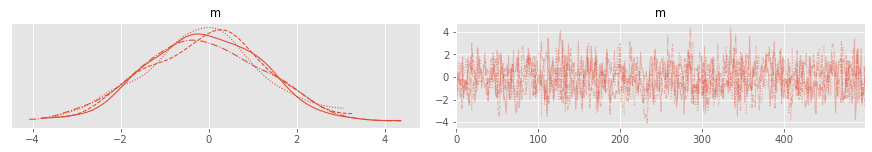

In [33]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
import arviz as az
az.plot_trace(trace)

Найдите вероятность $P(m < 0)$. Ответ запишите в переменную `ans_prob`.

In [90]:
np.mean(trace['m'] < 0)

0.5335

In [91]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
ans_prob = 0.5335
# your code here
ans_prob

0.5335

In [92]:
assert ans_prob > 0.5

# несколько похожих скрытых тестов

> __Важно:__ перед тем, как отправить тетрадку на проверку, закоментируйте все части кода, где делаются долгие вычисления. На грейдер наложено ограничение в работе в 30 секунд и он может не успеть отработать. Из-за этого задание специфицировано таким образом, что вам нужно получить ответы на вопросы и вбить их в переменные.

# Упражнение 2 (Челленджер)

Байесовский подход - это просто другой способ оценивать те же самые модели. Например, давайте попробуем оценить логистическую регрессию. 

$28$ января $1986$ года космический шатл «Челленджер» взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для $23$ предшествовавших катастрофе полётов «Челленджера» известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.

In [40]:
df = pd.read_csv('challenger.csv', sep=',')
print(df.shape)
df.head()

(23, 3)


,Date,Temperature,Incident
0,04/12/1981,66,0
1,11/12/1981,70,1
2,3/22/82,69,0
3,01/11/1982,68,0
4,04/04/1983,67,0


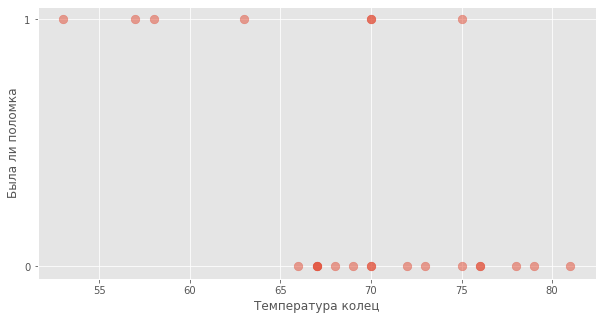

In [41]:
t = df.Temperature.values
y = df.Incident.values

plt.figure(figsize=(10, 5))
plt.scatter(t, y, s=75, alpha=0.5)
plt.yticks([0, 1])

plt.ylabel("Была ли поломка")
plt.xlabel("Температура колец");


Обучим Байесовскую версию логистичесской регресcии.  Модель буде выглядеть следующим образом: 

\begin{equation*}
\begin{aligned}
& \beta \sim N(0, 10^2) \\
& \alpha \sim N(0, 10^2) \\
& p \sim Bern(p) \\
& p = P(y = 1) = \frac{1}{1 + e^{\alpha + \beta \cdot t}}
\end{aligned}
\end{equation*}

In [66]:
import theano.tensor as tt  # под капотом пакета работает theano 
                            # именно на нём прописываются разные сложные формулы

t = df.Temperature.values
y = df.Incident.values

with pm.Model() as model:
    
    beta = pm.Normal('beta', mu=0, sigma=100)
    alpha = pm.Normal('alpha', mu=0, sigma=100)
    # your code here

    p = pm.Deterministic("p", 1.0/(1. + tt.exp(beta*t + alpha)))
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)
    # your code here
    

Найдите моду апостериорного распределения (байесовские методы для бедных). Запишите результат в переменную `map_estimate`.

In [67]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

map_estimate = pm.find_MAP(model=model)
map_estimate

# your code here


{'beta': array(0.23097618),
 'alpha': array(-14.96178309),
 'p': array([0.42980544, 0.23031211, 0.27377097, 0.32199965, 0.37434502,
        0.15862399, 0.13016753, 0.23031211, 0.85767849, 0.60115587,
        0.23031211, 0.04502965, 0.37434502, 0.93819917, 0.37434502,
        0.08616148, 0.23031211, 0.02303834, 0.06962871, 0.03607771,
        0.08616148, 0.06962871, 0.82709317])}

In [68]:
assert np.abs(float(map_estimate['beta']) - 0.23) < 1e-2

# несколько похожих скрытых тестов

Попробуем обучить модель немного по-новому. В переменной `step` запишемм конкретный алгоритм, который будем использовать при обучении. В `pm.sapmple` укажем из какой точке надо стартовать алгоритму. В качестве стартовой точки укажем моду апостериорного распределения, полученную в предыдущем пункте. 

In [69]:
# with model:
#     step = pm.Metropolis()
#     trace = pm.sample(120000, step=step, start=map_estimate)
#     burned_trace = trace[100000::10]  # оставляем каждое 10 наблюдение, чтобы соседние наблюдения были менее зависимы

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [alpha]
>Metropolis: [beta]


Sampling 4 chains for 1_000 tune and 120_000 draw iterations (4_000 + 480_000 draws total) took 557 seconds.
The number of effective samples is smaller than 10% for some parameters.


Посмотрим, сошлись ли цепи.

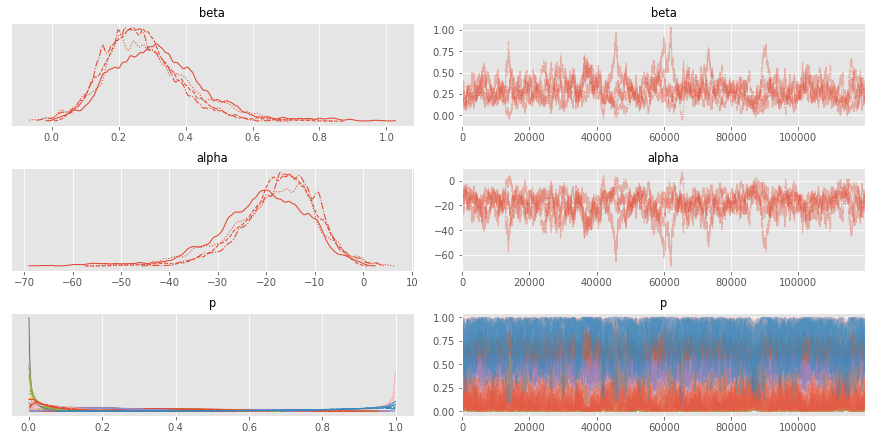

In [70]:
# az.plot_trace(trace)

Какова вероятность того, что $\beta < 0.0001$? То есть, какова вероятность того, что между температурой и вероятностью поломки нет связи? Запишите овтет в переменную `prob_beta`.

In [73]:
np.mean(trace['beta'] < 0.0001)

0.00275

In [74]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

prob_beta = 0.00275

# your code here


In [75]:
assert prob_beta < 0.1

# несколько похожих скрытых тестов

Нарисуем Получившиеся результаты. Для каждой температуры найдем $95\%$ байесовский интервал для вероятности того, что катастрофа произойдёт.

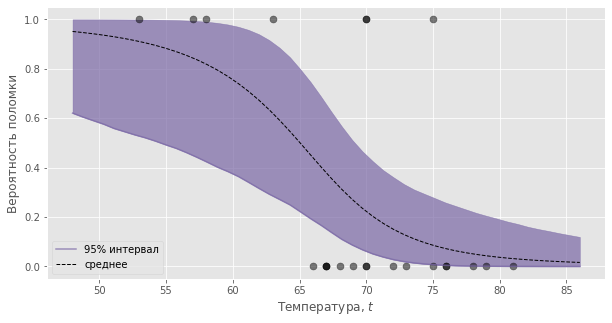

In [76]:
from scipy.stats.mstats import mquantiles

def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

t_seq = np.linspace(t.min() - 5, t.max()+5, 50)[:, None]
p_seq = logistic(t_seq.T, burned_trace['beta'][:,None], burned_trace['alpha'][:,None])

mean_prob_t = p_seq.mean(axis=0)
qs = mquantiles(p_seq, [0.025, 0.975], axis=0)

plt.figure(figsize=(10,5))
plt.fill_between(t_seq[:, 0], *qs, alpha=0.7, color="#7A68A6")
plt.plot(t_seq[:, 0], qs[0], label="95% интервал", color="#7A68A6", alpha=0.7)
plt.plot(t_seq, mean_prob_t, lw=1, ls="--", color="k", label="среднее")
plt.legend(loc="lower left")
plt.scatter(t, y, color="k", s=50, alpha=0.5)

plt.xlabel("Температура, $t$")
plt.ylabel("Вероятность поломки");

В день катастрофы температура уплотнителя была $31$ градус по Фарингейту. Найдите апостерионое распределение  вероятности катастрофы. 

In [80]:
dist = logistic(31, burned_trace['beta'][:,None], burned_trace['alpha'][:,None])

In [81]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here
dist

array([[0.99998257],
       [0.99997528],
       [0.99998738],
       ...,
       [0.9990418 ],
       [0.99941172],
       [0.99914377]])

Найдите $5\%$ квантиль, математическое ожидание и $95\%$ квантиль апостериорного распределения. Заишите их в соответствующие переменные. Что это означает в контексте прогноза катастрофы? 

In [85]:
np.quantile(dist, 0.05), np.quantile(dist, 0.95)

(0.9424505393446603, 0.9999999576206754)

In [86]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

q05 = 0.9424505393446603
avg = np.mean(dist)
q95 = 0.9999999576206754

# your code here


In [87]:
q05, q95

(0.9424505393446603, 0.9999999576206754)

In [83]:
assert q05  > 0.94

# несколько похожих скрытых тестов

> __Важно:__ перед тем, как отправить тетрадку на проверку, закоментируйте все части кода, где делаются долгие вычисления. На грейдер наложено ограничение в работе в 30 секунд и он может не успеть отработать. Из-за этого задание специфицировано таким образом, что вам нужно получить ответы на вопросы и вбить их в переменные.